# Decision Tree Demonstration - CIRC DMINE AG 



## Loading libraries and importing data.  

This dataset is a ~14000 record dataset of monthly crop loss and acreage values, that has been integrated with GRIDMET daily data - summarized to monthly, and at a county geographic scale - for only Washington.

In [1]:
import pandas as pd
import os
import numpy as np
os.chdir("/dmine/data/USDA/agmesh-scenarios/palouse/summaries/annual_county_summaries/")
train = pd.read_csv('WHEAT_drought_summary', index_col=0)

In [2]:
train

X         bi        pr           th      pdsi       pet        erc  \
1    2007  22.257944  0.590157   179.716284  0.486312  2.924690  29.660450   
2    2008  20.268424  0.574885   186.179884 -2.179470  2.197480  27.031190   
3    2009  20.346031  0.818023   175.879772 -2.580997  2.265066  27.881075   
4    2010  21.103356  0.969793   170.303043 -1.612611  2.154315  27.757036   
5    2011  18.076855  1.038922    96.125705  1.223308  2.026221  21.803058   
6    2012  21.594737  0.929032   179.709281 -1.957150  2.128671  27.161732   
7    2013  22.626085  0.971615   198.108415 -0.067833  2.264880  28.987169   
8    2014  23.939410  0.632172   159.599634 -1.633083  2.301870  30.912051   
9    2015  23.566787  0.894492   177.423081 -2.280920  2.496682  31.363380   
10   2007  24.288767  0.823954   230.118737 -1.834990  2.955132  33.197691   
11   2008  18.808378  1.103171   235.612136 -2.087995  2.263788  26.946243   
12   2009  20.567395  1.213905   228.646094  0.060873  2.304326  27.181045   
13   2010  24.102006  1.040937   216.885933 -1.347714  2.268699  31.907139   
14   2011  17.114030  1.529908   230.398238 -0.198157  2.114857  22.653489   
15   2012  21.090810  1.459981    13.117287  0.228913  2.247844  25.683825   
16   2013  23.362759  1.243548   227.686798  0.132627  2.317482  29.301593   
17   2014  20.276674  1.104371   219.398478  0.264032  2.268502  27.571485   
18   2015  23.168946  1.184591    48.238552 -0.205434  2.670521  32.711522   
19   2007  14.886717  1.471087   187.387944  0.434618  2.532446  21.112614   
20   2008  10.864488  2.079029   195.556598 -1.715086  1.876265  15.586531   
21   2009  13.913519  2.147188   179.140819  0.132973  2.025030  19.791371   
22   2010  18.590844  1.524537   183.079672 -2.378338  1.956242  24.010122   
23   2011  11.459453  2.376799  -833.302794 -2.099509  1.757237  13.726289   
24   2012  14.344410  2.455002   206.705604  0.560681  1.839024  16.609188   
25   2013  16.572919  2.059343   206.606508  2.209961  2.010130  20.801501   
26   2014  15.362175  1.882222 -3866.395848 -0.667969  1.938711  19.508158   
27   2015  18.327223  1.877624   176.985317 -1.734525  2.300032  24.502949   
28   2007  24.524005  0.564746   194.790428  0.739790  3.190967  32.699549   
29   2008  23.797475  0.701934   195.803432 -1.130847  2.465941  30.686208   
30   2009  21.678128  0.670733   188.043246 -1.154920  2.430979  28.512665   
..    ...        ...       ...          ...       ...       ...        ...   
205  2013  21.372234  1.479047   215.883861 -0.135980  2.502698  27.401622   
206  2014  22.441693  1.275843 -1512.805434 -1.669803  2.531371  28.406185   
207  2015  23.258283  1.354176  -127.348288 -2.512943  2.772902  31.748457   
208  2007  19.374026  1.031292   220.124083 -2.460049  2.729385  29.992726   
209  2008  15.133161  1.397929   229.939864 -2.004371  2.047594  22.630303   
210  2009  16.879616  1.420170   224.490986 -0.995609  2.131067  23.699363   
211  2010  18.892574  1.519764   216.010447 -1.165591  2.031347  25.368742   
212  2011  13.139570  1.964958   224.440413  1.824007  1.922773  18.103880   
213  2012  17.709370  1.647118   221.204944  1.430655  2.044213  23.129500   
214  2013  17.638775  1.454205   224.045996 -0.771468  2.097948  25.056093   
215  2014  16.265342  1.401578 -1917.775496  0.587368  2.051498  22.991444   
216  2015  18.870776  1.353305 -1116.710898 -0.400574  2.391678  27.662540   
217  2007  24.052653  0.650301   226.553301  1.500341  3.043579  30.899796   
218  2008  18.060851  1.304148   224.141542 -0.039008  2.269215  22.506525   
219  2009  18.669846  1.119837   211.984862 -1.275529  2.347536  24.526792   
220  2010  15.987624  1.318466   206.564277 -1.143910  2.104182  20.332441   
221  2011  15.470605  1.438784   217.916572  1.088571  2.034113  17.811579   
222  2012  16.993194  1.288152   213.335301 -0.208105  2.018794  20.980853   
223  2013  18.944520  1.175418   152.360643 -0.637838  2.270444  23.570470   
224  2014  19.162419  1.031473

In [10]:
[1] "year"              "month"             "countyfips"       
 [4] "bi"                "pr"                "th"               
 [7] "pdsi"              "pet"               "erc"              
[10] "rmin"              "rmax"              "tmmn"             
[13] "tmmx"              "srad"              "sph"              
[16] "vs"                "fm1000"            "fm100"            
[19] "statecode"         "state"             "countycode"       
[22] "county"            "commoditycode"     "commodity"        
[25] "insuranceplancode" "insurancename"     "stagecode"        
[28] "damagecausecode"   "damagecause"       "monthcode"        
[31] "acres"             "loss"              

bi        pr      pdsi       pet        erc          th  \
167     6.054593  0.553622 -0.544871  0.225537   3.939345  121.391800   
168     6.054593  0.553622 -0.544871  0.225537   3.939345  121.391800   
169     6.054593  0.553622 -0.544871  0.225537   3.939345  121.391800   
170     8.383828  0.481094 -0.252814  0.317566   7.667778  155.877700   
171     8.383828  0.481094 -0.252814  0.317566   7.667778  155.877700   
172     8.383828  0.481094 -0.252814  0.317566   7.667778  155.877700   
173     8.383828  0.481094 -0.252814  0.317566   7.667778  155.877700   
174     8.133179  0.359709 -1.903145  0.225871   6.753288  137.755800   
175     8.133179  0.359709 -1.903145  0.225871   6.753288  137.755800   
176     8.758175  0.346619 -1.255876  0.267324   7.445719  125.884400   
177     8.758175  0.346619 -1.255876  0.267324   7.445719  125.884400   
179     5.869708  0.543219 -1.061002  0.217009   3.252630  133.596100   
180     5.869708  0.543219 -1.061002  0.217009   3.252630  133.596100   
181     5.869708  0.543219 -1.061002  0.217009   3.252630  133.596100   
182     4.943660  0.901343 -1.852701  0.247117   3.026635  142.012300   
183     4.943660  0.901343 -1.852701  0.247117   3.026635  142.012300   
20847  13.057856  0.736573 -2.345594  0.599442  17.197694  145.982438   
20848  10.511047  1.445243 -1.373657  0.737827  14.717014  203.652094   
14444   9.990819  0.867923 -0.640701  0.516523   9.402403  166.044400   
14445   9.990819  0.867923 -0.640701  0.516523   9.402403  166.044400   
14446   9.990819  0.867923 -0.640701  0.516523   9.402403  166.044400   
14447   9.093326  1.344992 -0.142129  0.518968   8.027835  169.652200   
14448   9.093326  1.344992 -0.142129  0.518968   8.027835  169.652200   
14449   9.093326  1.344992 -0.142129  0.518968   8.027835  169.652200   
14450   9.093326  1.344992 -0.142129  0.518968   8.027835  169.652200   
14451   9.093326  1.344992 -0.142129  0.518968   8.027835  169.652200   
14452  11.651195  1.606665 -1.493257  0.633439  10.980840  188.794400   
14453  11.651195  1.606665 -1.493257  0.633439  10.980840  188.794400   
153    10.738771  0.456842 -0.886479  0.727261  11.618673  102.697700   
154    10.738771  0.456842 -0.886479  0.727261  11.618673  102.697700   
...          ...       ...       ...       ...        ...         ...   
34492   4.663915  3.230010 -2.783206  0.691950   9.682621  153.362368   
34493   4.663915  3.230010 -2.783206  0.691950   9.682621  153.362368   
20194   5.346408  1.734411 -3.488111  0.546155   5.477075  180.987900   
20195   5.346408  1.734411 -3.488111  0.546155   5.477075  180.987900   
20207   9.401609  1.635089 -4.568083  0.646142   9.310773  183.430700   
20208   9.401609  1.635089 -4.568083  0.646142   9.310773  183.430700   
20209   9.401609  1.635089 -4.568083  0.646142   9.310773  183.430700   
20210   9.401609  1.635089 -4.568083  0.646142   9.310773  183.430700   
20211   9.401609  1.635089 -4.568083  0.646142   9.310773  183.430700   
20212   2.583767  2.768167 -2.822484  0.545026   2.028276  186.773200   
20213   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20214   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20215   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20216   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20217   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20218   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20219   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20220   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20221   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20222   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20223   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20224   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   
20225   4.643872  3.598868 -3.422057  0.708001   6.239316  167.790800   

In [3]:
# create feature matrix (X)
all_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres', 'loss', "year", "county"]
feature_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 
                'rmin', 'rmax']

X = train[feature_cols]

# create response vector (y)
y = train.loss

train = train[all_cols]

In [4]:
X.acres[np.isnan(X.acres)] = 0

AttributeError: 'DataFrame' object has no attribute 'acres'

## Set up training and testing 

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
train.loss

1        809446.18
2       9092419.41
3      23818635.40
4        607100.54
5         16797.00
6         51837.76
7        318269.09
8       6292991.41
9      10916665.39
10       536419.40
11      1497640.80
12       772269.36
13       111309.80
14        11587.00
15            0.00
16       228845.00
17        94396.00
18       133001.73
19        48476.00
20       272744.33
21       362591.50
22        13716.50
23            0.00
24            0.00
25        61219.80
26       187008.60
27      1432966.89
28        12921.00
29       478862.12
30      1554369.44
          ...     
205     3072492.09
206     6410531.99
207     8970847.01
208      217156.20
209      167886.00
210           0.00
211           0.00
212           0.00
213           0.00
214       23061.20
215      207782.50
216      142060.63
217      449085.40
218     1450399.30
219     1081351.47
220           0.00
221           0.00
222      247546.00
223     1190885.70
224      892465.00
225     1379315.10
226      689

## Building a regression tree in scikit-learn

In [7]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [8]:
# use 10 fold CV to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

4432054.561927666

## Tuning regression tree

Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [9]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

3391702.9074244858

## Looping thru a set number of max_depths to see the optimum level

In [12]:
# list of values to try
max_depth_range = range(1, 50)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

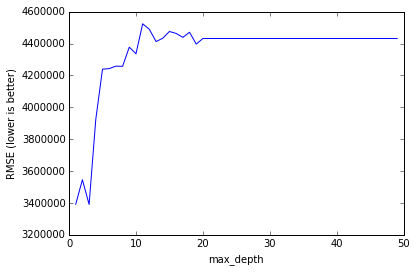

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [14]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [15]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

feature  importance
0       bi    0.000000
1       pr    0.000000
2     pdsi    0.470571
3      pet    0.246554
4      erc    0.000000
5       th    0.072563
6       vs    0.000000
7   fm1000    0.000000
8    fm100    0.000000
9     srad    0.210312
10     sph    0.000000
11    tmmx    0.000000
12    tmmn    0.000000
13    rmin    0.000000
14    rmax    0.000000

## Creating a tree diagram

In [18]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_ag.dot', feature_names=feature_cols)



In [23]:
dot -Tpng tree_ag.dot -o tree_ag.png

SyntaxError: invalid syntax (<ipython-input-23-eea91b8f357b>, line 1)

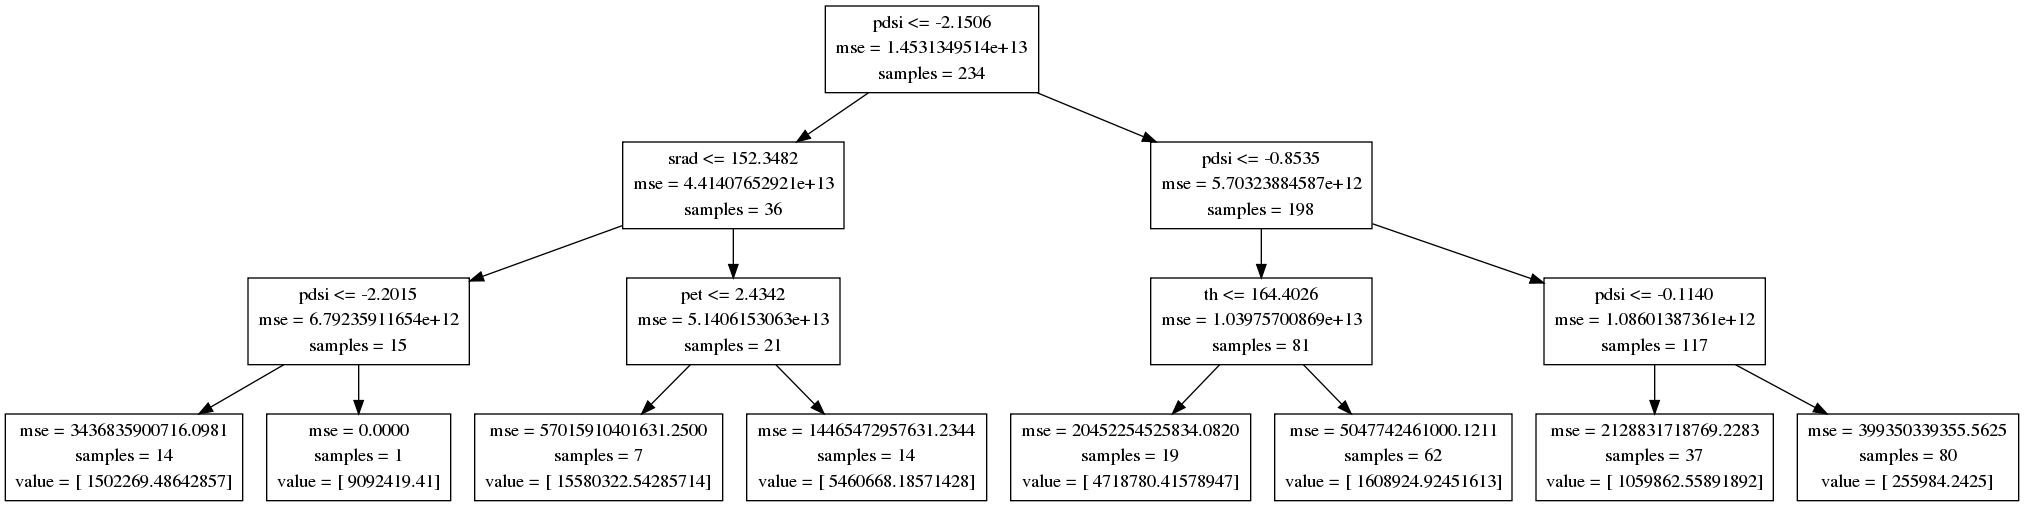

In [24]:
from IPython.display import Image
os.chdir("/dmine/data/USDA/agmesh-scenarios/palouse/summaries/annual_county_summaries/")
Image(filename="tree_ag.png")
# At the command line, run this to convert to PNG:
# dot -Tpng tree_vehicles.dot -o tree_vehicles.png

## Making predictions for the testing data

## Convert tree to json!!

In [28]:
import sklearn

def treeToJson(decision_tree, feature_names=None):
  from warnings import warn
 
  js = ""
 
  def node_to_str(tree, node_id, criterion):
    if not isinstance(criterion, sklearn.tree.tree.six.string_types):
      criterion = "impurity"
 
    value = tree.value[node_id]
    if tree.n_outputs == 1:
      value = value[0, :]
 
    jsonValue = ', '.join([str(x) for x in value])
 
    if tree.children_left[node_id] == sklearn.tree._tree.TREE_LEAF:
      return '"id": "%s", "criterion": "%s", "impurity": "%s", "samples": "%s", "value": [%s]' \
             % (node_id, 
                criterion,
                tree.impurity[node_id],
                tree.n_node_samples[node_id],
                jsonValue)
    else:
      if feature_names is not None:
        feature = feature_names[tree.feature[node_id]]
      else:
        feature = tree.feature[node_id]
 
      if "=" in feature:
        ruleType = "="
        ruleValue = "false"
      else:
        ruleType = "<="
        ruleValue = "%.4f" % tree.threshold[node_id]
 
      return '"id": "%s", "rule": "%s %s %s", "%s": "%s", "samples": "%s"' \
             % (node_id, 
                feature,
                ruleType,
                ruleValue,
                criterion,
                tree.impurity[node_id],
                tree.n_node_samples[node_id])
 
  def recurse(tree, node_id, criterion, parent=None, depth=0):
    tabs = "  " * depth
    js = ""
 
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]
 
    js = js + "\n" + \
         tabs + "{\n" + \
         tabs + "  " + node_to_str(tree, node_id, criterion)
 
    if left_child != sklearn.tree._tree.TREE_LEAF:
      js = js + ",\n" + \
           tabs + '  "left": ' + \
           recurse(tree, \
                   left_child, \
                   criterion=criterion, \
                   parent=node_id, \
                   depth=depth + 1) + ",\n" + \
           tabs + '  "right": ' + \
           recurse(tree, \
                   right_child, \
                   criterion=criterion, \
                   parent=node_id,
                   depth=depth + 1)
 
    js = js + tabs + "\n" + \
         tabs + "}"
 
    return js
 
  if isinstance(decision_tree, sklearn.tree.tree.Tree):
    js = js + recurse(decision_tree, 0, criterion="impurity")
  else:
    js = js + recurse(decision_tree.tree_, 0, criterion=decision_tree.criterion)
 
  return js

In [29]:
palouse_json = treeToJson(treereg, feature_names = feature_cols)

In [30]:
import json
with open('palouse_json.txt', 'w') as outfile:
    json.dump(palouse_json, outfile)

In [20]:
# read the testing data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_test.csv'
test = pd.read_csv(url)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

price  year   miles  doors  vtype
0   3000  2003  130000      4      1
1   6000  2005   82500      4      0
2  12000  2010   60000      2      0

**Question:** Using the tree diagram above, what predictions will the model make for each observation?

In [21]:
# use fitted model to make predictions on testing data
X_test = test[feature_cols]
y_test = test.price
y_pred = treereg.predict(X_test)
y_pred

array([  4000.,   5000.,  13500.])

In [22]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1190.2380714238084

In [23]:
# calculate RMSE for your own tree!
y_test = [3000, 6000, 12000]
y_pred = [0, 0, 0]
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

7937.2539331937714

## Comparing regression trees and classification trees

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize Gini index (discussed below)|

## Splitting criteria for classification trees

Common options for the splitting criteria:

- **classification error rate:** fraction of training observations in a region that don't belong to the most common class
- **Gini index:** measure of total variance across classes in a region

### Example of classification error rate

Pretend we are predicting whether someone buys an iPhone or an Android:

- At a particular node, there are **25 observations** (phone buyers), of whom **10 bought iPhones and 15 bought Androids**.
- Since the majority class is **Android**, that's our prediction for all 25 observations, and thus the classification error rate is **10/25 = 40%**.

Our goal in making splits is to **reduce the classification error rate**. Let's try splitting on gender:

- **Males:** 2 iPhones and 12 Androids, thus the predicted class is Android
- **Females:** 8 iPhones and 3 Androids, thus the predicted class is iPhone
- Classification error rate after this split would be **5/25 = 20%**

Compare that with a split on age:

- **30 or younger:** 4 iPhones and 8 Androids, thus the predicted class is Android
- **31 or older:** 6 iPhones and 7 Androids, thus the predicted class is Android
- Classification error rate after this split would be **10/25 = 40%**

The decision tree algorithm will try **every possible split across all features**, and choose the split that **reduces the error rate the most.**

### Example of Gini index

Calculate the Gini index before making a split:

$$1 - \left(\frac {iPhone} {Total}\right)^2 - \left(\frac {Android} {Total}\right)^2 = 1 - \left(\frac {10} {25}\right)^2 - \left(\frac {15} {25}\right)^2 = 0.48$$

- The **maximum value** of the Gini index is 0.5, and occurs when the classes are perfectly balanced in a node.
- The **minimum value** of the Gini index is 0, and occurs when there is only one class represented in a node.
- A node with a lower Gini index is said to be more "pure".

Evaluating the split on **gender** using Gini index:

$$\text{Males: } 1 - \left(\frac {2} {14}\right)^2 - \left(\frac {12} {14}\right)^2 = 0.24$$
$$\text{Females: } 1 - \left(\frac {8} {11}\right)^2 - \left(\frac {3} {11}\right)^2 = 0.40$$
$$\text{Weighted Average: } 0.24 \left(\frac {14} {25}\right) + 0.40 \left(\frac {11} {25}\right) = 0.31$$

Evaluating the split on **age** using Gini index:

$$\text{30 or younger: } 1 - \left(\frac {4} {12}\right)^2 - \left(\frac {8} {12}\right)^2 = 0.44$$
$$\text{31 or older: } 1 - \left(\frac {6} {13}\right)^2 - \left(\frac {7} {13}\right)^2 = 0.50$$
$$\text{Weighted Average: } 0.44 \left(\frac {12} {25}\right) + 0.50 \left(\frac {13} {25}\right) = 0.47$$

Again, the decision tree algorithm will try **every possible split**, and will choose the split that **reduces the Gini index (and thus increases the "node purity") the most.**

### Comparing classification error rate and Gini index

- Gini index is generally preferred because it will make splits that **increase node purity**, even if that split does not change the classification error rate.
- Node purity is important because we're interested in the **class proportions** in each region, since that's how we calculate the **predicted probability** of each class.
- scikit-learn's default splitting criteria for classification trees is Gini index.

Note: There is another common splitting criteria called **cross-entropy**. It's numerically similar to Gini index, but slower to compute, thus it's not as popular as Gini index.

## Building a classification tree in scikit-learn

We'll build a classification tree using the Titanic data:

In [24]:
# read in the data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url)

# encode female as 0 and male as 1
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# fill in the missing values for age with the median age
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# print the updated DataFrame
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   38      1      0   
2                             Heikkinen, Miss. Laina    0   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   35      1      0   
4                           Allen, Mr. William Henry    1   35      0      0   

             Ticket     Fare Cabin Embarked  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN        S           0           1  
1          PC 17599  71.2833   C85        C           0           0  
2  STON/O2. 3101282   7.9250   NaN        S           0           1  
3            113803  53.1000  C123        S           0           1  
4            373450   8.0500   NaN        S           0           1

- **Survived:** 0=died, 1=survived (response variable)
- **Pclass:** 1=first class, 2=second class, 3=third class
    - What will happen if the tree splits on this feature?
- **Sex:** 0=female, 1=male
- **Age:** numeric value
- **Embarked:** C or Q or S

In [25]:
# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

In [26]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best')

In [27]:
# create a Graphviz file
export_graphviz(treeclf, out_file='tree_titanic.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_titanic.dot -o tree_titanic.png

![Tree for Titanic data](images/tree_titanic.png)

Notice the split in the bottom right: the **same class** is predicted in both of its leaves. That split didn't affect the **classification error rate**, though it did increase the **node purity**, which is important because it increases the accuracy of our predicted probabilities.

In [28]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

feature  importance
0      Pclass    0.242664
1         Sex    0.655584
2         Age    0.064494
3  Embarked_Q    0.000000
4  Embarked_S    0.037258

# Part 3: Comparing decision trees with other models

**Advantages of decision trees:**

- Can be used for regression or classification
- Can be displayed graphically
- Highly interpretable
- Can be specified as a series of rules, and more closely approximate human decision-making than other models
- Prediction is fast
- Features don't need scaling
- Automatically learns feature interactions
- Tends to ignore irrelevant features
- Non-parametric (will outperform linear models if relationship between features and response is highly non-linear)

![Trees versus linear models](images/tree_vs_linear.png)

**Disadvantages of decision trees:**

- Performance is (generally) not competitive with the best supervised learning methods
- Can easily overfit the training data (tuning is required)
- Small variations in the data can result in a completely different tree (high variance)
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
- Doesn't tend to work well if the classes are highly unbalanced
- Doesn't tend to work well with very small datasets